<a href="https://colab.research.google.com/github/UCREL/Session_3_Semantic_Analysis/blob/main/dl_sentiment_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
# ⚛**Emotion Analysis - Cancer Narratives**⚛
---
---


In [1]:
examples = ["At first I thought she might make a good recovery because she started eating well and seemed happy.", "Going into town I will enjoy the delightful offerings from del taco and a Xanex. We dine like kings!" ,"I’m going to die, and I’m going to do it with as much dignity as possible, and have the best last few months I can possibly have.", "I made him breakfast, and dinner and tried to keep a positive mindset and just do the happy stuff we always loved doing, jamming, joking, eating waffles.",
"Today I am officially 25 years cancer free.", "Hello comrades, just wanted to share my story after a surgery where I scored another goal against cancer and made it 3-0.", "I told her I loved her and held her hand while they ended life support.",
"But hearing the phrase, 'you no longer have cancer' makes me feel invincible again.", "I’m still battling side effects but I’m so relieved to be done!!" "I get to come home to my beautiful wife and loving dog every time.",
"I’m trying to take it all in and enjoy my family and the festivities. There’s so much to enjoy.", "I have been told I will never be cancer free, I have learnt to accept that. ", "Finished a year of treatment and continued on maintenance chemotherapy for another year and was cancer free for a while until I relapsed at 22.", "I’ve completed 8 rounds of chemotherapy and 25 sessions of chemoradiation.", "This morning was my last day of radiation!", "They were able to cut out the tumor but weren't successful in getting clean margins on the first pass."]

In [2]:
examples

['At first I thought she might make a good recovery because she started eating well and seemed happy.',
 'Going into town I will enjoy the delightful offerings from del taco and a Xanex. We dine like kings!',
 'I’m going to die, and I’m going to do it with as much dignity as possible, and have the best last few months I can possibly have.',
 'I made him breakfast, and dinner and tried to keep a positive mindset and just do the happy stuff we always loved doing, jamming, joking, eating waffles.',
 'Today I am officially 25 years cancer free.',
 'Hello comrades, just wanted to share my story after a surgery where I scored another goal against cancer and made it 3-0.',
 'I told her I loved her and held her hand while they ended life support.',
 "But hearing the phrase, 'you no longer have cancer' makes me feel invincible again.",
 'I’m still battling side effects but I’m so relieved to be done!!I get to come home to my beautiful wife and loving dog every time.',
 'I’m trying to take it al

---
# **Roberta Go - [Roberta - Go Emotions](https://huggingface.co/SamLowe/roberta-base-go_emotions)**
---



In [3]:
from transformers import pipeline

classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

robertaGo = []
for ex in examples:
  model_output = classifier(ex)
  robertaGo.append(model_output[0][0])
# produces a list of dicts for each of the labels


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

---
# **T5 - [T5-base fine-tuned for Emotion Recognition ](https://huggingface.co/mrm8488/t5-base-finetuned-emotion)**
---



In [4]:
from transformers import AutoTokenizer, AutoModelWithLMHead

tokenizer = AutoTokenizer.from_pretrained("mrm8488/t5-base-finetuned-emotion")

model = AutoModelWithLMHead.from_pretrained("mrm8488/t5-base-finetuned-emotion")

t5 =  []
def get_emotion(text):
  input_ids = tokenizer.encode(text + '</s>', return_tensors='pt')

  output = model.generate(input_ids=input_ids,
               max_length=2)

  dec = [tokenizer.decode(ids) for ids in output]
  label = dec[0]
  return label

for ex in examples:
  t5.append(get_emotion(ex))


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/models/auto/modeling_auto.py:1712: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/892M [00:00<?, ?B/s]

---
# **DistilBert - [DistilBERT base uncased finetuned SST-2](https://huggingface.co/blog/sentiment-analysis-python)**
---


In [5]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

distil = []
for ex in examples:
  inputs = tokenizer(ex, return_tensors="pt")
  with torch.no_grad():
      logits = model(**inputs).logits

  predicted_class_id = logits.argmax().item()
  distil.append(model.config.id2label[predicted_class_id])

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

---
# **Roberta [Roberta-TweetEval benchmark](https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest)**
---

In [6]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax

# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)

model = AutoModelForSequenceClassification.from_pretrained(MODEL)

roberta =  []
for text in examples:
  text = preprocess(text)
  encoded_input = tokenizer(text, return_tensors='pt')
  output = model(**encoded_input)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  ranking = np.argsort(scores)
  ranking = ranking[::-1]
  for i in range(scores.shape[0]):
      l = config.id2label[ranking[i]]
      s = scores[ranking[i]]
      # roberta.append(f"{l} {np.round(float(s), 4)}")
      roberta.append(l)

roberta = [v for i, v in enumerate(roberta) if i%3 == 0]

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


---
# **NRCLex - [National Research Council Canada (NRC) affect lexicon](https://pypi.org/project/NRCLex/)**
---

In [7]:
!pip install NRCLex

INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43309 sha256=bb30902843487a1b2130d9d8c3f205f6d867fb9674cc6dad2d63860b5319a6e2
  Stored in directory: /root/.cache/pip/wheels/d2/10/44/6abfb1234298806a145fd6bcaec8cbc712e88dd1cd6cb242fa
Successfully built NRCLex


In [8]:
from nrclex import NRCLex
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
nrclex = []
for ex in examples:
  text_object = NRCLex(ex)
  nrclex.append(text_object.top_emotions)

---
# **USAS**
---



In [10]:
# Install the PyDrive wrapper & import libraries.
!pip install import-ipynb
!pip install -U -q PyDrive

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.8 MB/s eta 0:00:00


In [11]:
import import_ipynb
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [12]:
# Copy the link and remove the front part of the link (i.e. https://drive.google.com/open?id=) to get the file ID.
your_module = drive.CreateFile({'id':'1qd531E2R36wwqGa9wlTZa5MquLKlFFaS'})
your_module.GetContentFile('usas_sentiment_classifier.ipynb')
import usas_sentiment_classifier

importing Jupyter notebook from usas_sentiment_classifier.ipynb
Mounted at /content/gdrive/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 902.0/902.0 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.1.7
    Uninstalling click-8.1.7:
      Successfully uninstalled click-8.1.7
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 39.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
usas_sents = []
for ex in examples:
  emo_dict = usas_sentiment_classifier.usas_emotion_tags(ex)
  sent, pos, neg, neu = usas_sentiment_classifier.usas_sentiment_classifier(emo_dict, 0, 0, 0)
  probs = usas_sentiment_classifier.text_sentiment_prob(ex, pos, neg, neu)
  usas_sents.append(probs)

In [14]:
usas_sents

['positive=0.5, negative=0.5, neutral=0.0',
 'positive=0.6666666666666666, negative=0.0, neutral=0.3333333333333333',
 'positive=0.0, negative=0.0, neutral=1.0',
 'positive=0.8, negative=0.2, neutral=0.0',
 'positive=0.0, negative=0.0, neutral=1.0',
 'positive=0.0, negative=0.0, neutral=1.0',
 'positive=0.0, negative=0.0, neutral=1.0',
 'positive=0.0, negative=0.0, neutral=1.0',
 'positive=0.5, negative=0.5, neutral=0.0',
 'positive=0.6666666666666666, negative=0.0, neutral=0.3333333333333333',
 'positive=0.0, negative=0.0, neutral=1.0',
 'positive=0.0, negative=0.0, neutral=1.0',
 'positive=0.0, negative=0.0, neutral=1.0',
 'positive=0.0, negative=0.0, neutral=1.0',
 'positive=0.0, negative=1.0, neutral=0.0']

---
# **Comparative Analysis**
---

In [15]:
import pandas as pd

eval_set = pd.DataFrame()
eval_set['Sentences'] = examples
eval_set['USAS'] = usas_sents
eval_set['Roberta'] = roberta
eval_set['DistilBERT'] = distil
eval_set['NRCLex'] = nrclex
eval_set['T5'] = t5
eval_set['RobertaGo'] = robertaGo

In [16]:
eval_set

,Sentences,USAS,Roberta,DistilBERT,NRCLex,T5,RobertaGo
0,At first I thought she might make a good recov...,"positive=0.5, negative=0.5, neutral=0.0",positive,POSITIVE,"[(positive, 0.2727272727272727), (anticipation...",<pad> joy,"{'label': 'joy', 'score': 0.7537980079650879}"
1,Going into town I will enjoy the delightful of...,"positive=0.6666666666666666, negative=0.0, neu...",positive,POSITIVE,"[(trust, 0.25), (positive, 0.25), (joy, 0.25),...",<pad> joy,"{'label': 'joy', 'score': 0.8973855972290039}"
2,"I’m going to die, and I’m going to do it with ...","positive=0.0, negative=0.0, neutral=1.0",positive,POSITIVE,"[(fear, 0.2), (trust, 0.2), (positive, 0.2), (...",<pad> joy,"{'label': 'optimism', 'score': 0.6296712160110..."
3,"I made him breakfast, and dinner and tried to ...","positive=0.8, negative=0.2, neutral=0.0",positive,POSITIVE,"[(positive, 0.5714285714285714)]",<pad> joy,"{'label': 'joy', 'score': 0.6845881938934326}"
4,Today I am officially 25 years cancer free.,"positive=0.0, negative=0.0, neutral=1.0",positive,POSITIVE,"[(fear, 0.2), (anger, 0.2), (negative, 0.2), (...",<pad> joy,"{'label': 'joy', 'score': 0.30957338213920593}"
5,"Hello comrades, just wanted to share my story ...","positive=0.0, negative=0.0, neutral=1.0",positive,POSITIVE,"[(fear, 0.18181818181818182), (sadness, 0.1818...",<pad> joy,"{'label': 'desire', 'score': 0.30540749430656433}"
6,I told her I loved her and held her hand while...,"positive=0.0, negative=0.0, neutral=1.0",positive,POSITIVE,"[(fear, 0.0), (anger, 0.0), (anticip, 0.0), (t...",<pad> love,"{'label': 'love', 'score': 0.90290766954422}"
7,"But hearing the phrase, 'you no longer have ca...","positive=0.0, negative=0.0, neutral=1.0",positive,POSITIVE,"[(fear, 0.2857142857142857), (negative, 0.2857...",<pad> joy,"{'label': 'joy', 'score': 0.3020242750644684}"
8,I’m still battling side effects but I’m so rel...,"positive=0.5, negative=0.5, neutral=0.0",positive,POSITIVE,"[(positive, 0.3333333333333333), (joy, 0.33333...",<pad> joy,"{'label': 'joy', 'score': 0.725010871887207}"
9,I’m trying to take it all in and enjoy my fami...,"positive=0.6666666666666666, negative=0.0, neu...",positive,POSITIVE,"[(trust, 0.25), (positive, 0.25), (joy, 0.25),...",<pad> joy,"{'label': 'joy', 'score': 0.8999955058097839}"


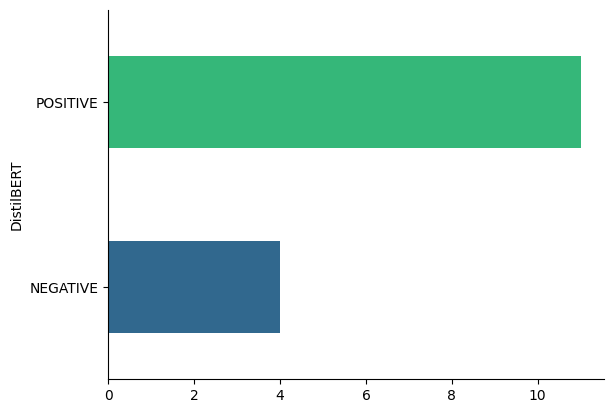

In [17]:
# @title DistilBERT

from matplotlib import pyplot as plt
import seaborn as sns
eval_set.groupby('DistilBERT').size().plot(kind='barh', color=sns.palettes.mpl_palette("viridis", 2))
plt.gca().spines[['top', 'right',]].set_visible(False)

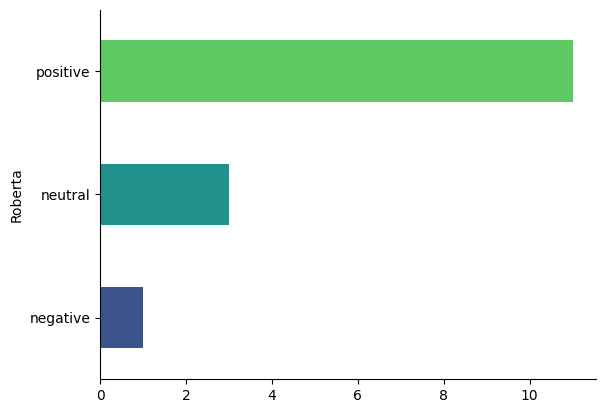

In [18]:
# @title ROBERTA

from matplotlib import pyplot as plt
import seaborn as sns
eval_set.groupby('Roberta').size().plot(kind='barh', color=sns.mpl_palette("viridis", 3))
plt.gca().spines[['top', 'right',]].set_visible(False)

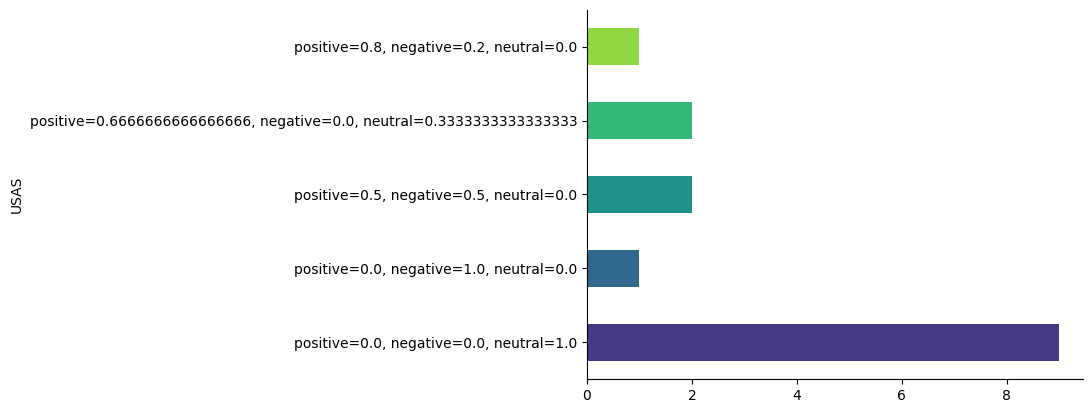

In [19]:
# @title USAS

from matplotlib import pyplot as plt
import seaborn as sns
eval_set.groupby('USAS').size().plot(kind='barh', color=sns.palettes.mpl_palette("viridis", 5))
plt.gca().spines[['top', 'right',]].set_visible(False)

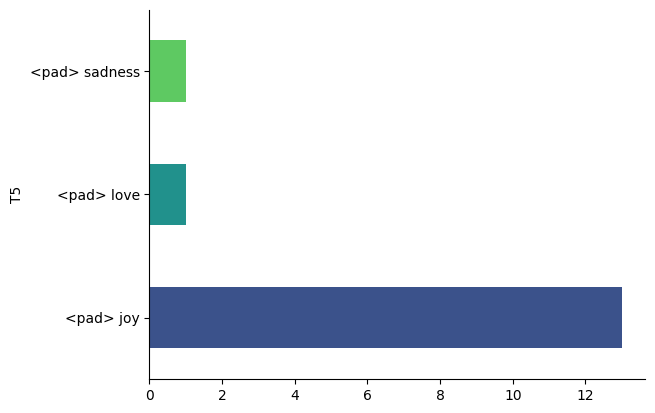

In [20]:
# @title T5

from matplotlib import pyplot as plt
import seaborn as sns
eval_set.groupby('T5').size().plot(kind='barh', color=sns.mpl_palette("viridis", 3))
plt.gca().spines[['top', 'right',]].set_visible(False)